
<section style="position:relative; width:100%;">

<div style="display:inline-block;">
<img src="images/ioapps_small.png" style="width:200px;" /> 
<p> Formateur :<br /> Pierre-Olivier Simonard <br />
<a href="mailto:pierre.olivier.simonard@gmail.com">pierre.olivier.simonard@gmail.com</a></p>
</div>

<div style="display:inline-block; float:right">
    <h3>ICAM </h3>
    <p>Formation Data Science</p>
    <p>Novembre 2022</p>
    <img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.eu.png"  width="100px" />
</div>

</section>


<h1 style="text-align: center; width:100%">Programmation Python</h1>
<h2 style="text-align: center; width:100%">Partie 7.0 : Exercice guidé, pour aller plus loin </h2>

<!--  
Novembre 2022
Pierre-Oliver Simonard - pierre.olivier.simonard@gmail.com
-->

<style>
div.warn {    
    background-color: #fcf2f2;
    border-color: #dFb5b4;
    border-left: 5px solid #dfb5b4;
    padding: 0.5em;
    }
</style>


## Objectif : 

Ce support de cours a pour objectif de faire la jonction avec les supports de cours de formation à distance, ainsi que les autres matières de la formation.


## Contenu : 

Avec le support de cours de Python, vous trouverez un fichier 3 fichiers contenant **les données d'offres de logements sur le site AirBnB pour la ville de Lyon.**

Ces 3 fichiers contiennent les mêmes données, mais dans 3 format différents : 

* airbnb.json :  
Json est un format de fichier pris en charge par différents langages de programmation.  
Avec ce format, vous serez amenés à manipuler des structures de données simples que nous avons déjà vu : listes, dictionnaires, ...

* airbnb.sqlite :  
SQLite est un format de base de donnée SQL qui a l'avantage de stocker toutes les données dans un seul fichier. 
Avec ce format, vous serez amenés à rédiger des requêtes SQL pour traiter vos données.

* airbnb.csv : 
CSV est un format de données "plat", où une ligne représente un enregistrement, et chaque colonne correspond à une propriété de cet enregistrement.
Le traitement et l'utilisation de ce type de fichier est facilié en python par le module Pandas, que vous découvrirez dans la phase de formation à distance.



## Partie 1 : Découverte des données et utilisation du format Json 


Dans le répertoire où se trouve votre fichier `airbnb.json`, creez un programme avec le code suivant :

In [2]:
import json

def load_data():
    with open("airbnb.json", "r") as f:
        data = json.loads(f.read())
    return data


airbnb_data = load_data()

print(len(airbnb_data))
print(airbnb_data[0])

8007
{'room_id': 8837444, 'host_id': 22963748, 'neighborhood': 'Mutualité - Préfecture - Moncey', 'nbr_reviews': 0, 'overall_satisfaction': 0.0, 'nbr_guests_max': 8, 'bedrooms': 4.0, 'price': 316.0, 'latitude': 45.761936, 'longitude': 4.843863}


* Ce programme charge les données du fichier en mémoire, affiche le nombre d'enregistrements présents, et affiche le premier enregistrement.

* airbnb_data est une liste de dictionnaires.

* Les informations stockées sont :
    * __room_id__ : un numéro qui identifie un logement de manière unique
    * __host_id__ : un numéro qui identifie un hébergeur de manière unique
    * __neighborhood__ : Nom du quartier où se trouve le logement
    * __nbr_reviews__ : Nombre d'évaluations pour ce logement
    * __overall_satisfaction__ : Evaluation moyenne pour ce logement
    * __nbr_guests_max__ : nombre maximum de personnes pouvant être hebergées
    * __bedrooms__ : nombre de chambres à disposition 
    * __price__ : Prix d'une nuit de location
    * __latitude / longitude__ : coordonnées GPS du logement.


* Regardons les 5 premières données :

In [3]:
# ... suite du code précédent
# ...
# airbnb_data = load_data()

for housing in airbnb_data[0:5]:
    print(housing)
    print("\n")

{'room_id': 8837444, 'host_id': 22963748, 'neighborhood': 'Mutualité - Préfecture - Moncey', 'nbr_reviews': 0, 'overall_satisfaction': 0.0, 'nbr_guests_max': 8, 'bedrooms': 4.0, 'price': 316.0, 'latitude': 45.761936, 'longitude': 4.843863}


{'room_id': 2766451, 'host_id': 1817994, 'neighborhood': 'Villette - Paul Bert', 'nbr_reviews': 6, 'overall_satisfaction': 4.5, 'nbr_guests_max': 11, 'bedrooms': 4.0, 'price': 415.0, 'latitude': 45.756894, 'longitude': 4.8700980000000005}


{'room_id': 16181873, 'host_id': 64141811, 'neighborhood': 'Voltaire - Part Dieu', 'nbr_reviews': 0, 'overall_satisfaction': 0.0, 'nbr_guests_max': 4, 'bedrooms': 1.0, 'price': 190.0, 'latitude': 45.757434, 'longitude': 4.852721}


{'room_id': 19960001, 'host_id': 141278260, 'neighborhood': 'Villette - Paul Bert', 'nbr_reviews': 0, 'overall_satisfaction': 0.0, 'nbr_guests_max': 5, 'bedrooms': 2.0, 'price': 125.0, 'latitude': 45.755403, 'longitude': 4.8651620000000015}


{'room_id': 9930751, 'host_id': 51047935, 

### Exercice 1 

Nous savons combien de logements il y a à louer :

In [37]:
print(len(airbnb_data))

8007


Nous cherchons à répondre aux questions suivantes :
* Quel est le prix du logement le plus cher ? 
* Quel est le prix moyen d'un logement ? 


Pour cela, la démarche est la suivante :
* Tout d'abord, construisez une liste contenant les prix de tous les appartements.
* Ensuite, nous allons utiliser des nouvelles fonctions : `max()` et `sum()`
    * `max()` prend en paramètre une liste de valeurs numériques, et retourne le **maximum** (`min()` existe également)
    * `sum()` prend en paramètre une liste de valeurs numériques, et retourne leur **somme**
* Pour calculer la moyenne, nous utiliserons la somme divisée par le nombre d'élements.

* Proposez un programme qui détermine le prix du logement le plus cher

In [39]:
def prixmax():
    for h in airbnb_data: 
        result = max(list(airbnb_data), key = lambda v:v["price"])
        return result
print(prixmax())

{'room_id': 3322978, 'host_id': 9997315, 'neighborhood': 'Quartiers anciens', 'nbr_reviews': 0, 'overall_satisfaction': 0.0, 'nbr_guests_max': 6, 'bedrooms': 3.0, 'price': 1424.0, 'latitude': 45.764941, 'longitude': 4.825151}


* à partir de votre liste de prix, et de la fonction sum(), déduisez en le prix moyen des appartements.

In [36]:
def prixmoy():
    result = 0
    for h in airbnb_data : 
        result += h["price"]
    return result / len(airbnb_data)
print(prixmoy())

101.10378418883477


### Exercice 2 :

On connait désormais le prix du logement le plus cher et le prix moyen sur l'ensemble de la ville.

Ecrivez un programme pour obtenir *le logement* le plus cher, c'est à dire tout le dictionnaire représentant ce logement. 


In [49]:
def prixmax():
    for h in airbnb_data: 
        result = max(list(airbnb_data), key = lambda v:v["price"])
        return result
print(prixmax())

{'room_id': 3322978, 'host_id': 9997315, 'neighborhood': 'Quartiers anciens', 'nbr_reviews': 0, 'overall_satisfaction': 0.0, 'nbr_guests_max': 6, 'bedrooms': 3.0, 'price': 1424.0, 'latitude': 45.764941, 'longitude': 4.825151}


### Exercice 3 :

Nous cherchons à répondre aux questions suivantes :
* Quel est le logement avec la plus grande capacité d'accueil ? (en utilisant nbr_guests_max)
* Quel est la capacité d'accueil moyenne des logements ?
* Quel logement a le plus grand nombre de reviews ? 
* Quel logement a la meilleure évaluation ?


Inspirez vous des exercices 1 et 2 pour proposer 4 fonctions qui permettent de répondre à ces questions.

In [48]:
# Logement avec la plus grand capacité d'accueil
def maxguest():
    for h in airbnb_data: 
        result = max(list(airbnb_data), key = lambda h:h["nbr_guests_max"])
        return result["nbr_guests_max"]
print(maxguest())

16


In [57]:
# capacité d'accueil moyenne
def moyguest():
    result = 0
    for h in airbnb_data: 
        result += h["nbr_guests_max"]
    return result / len(airbnb_data)
print(moyguest())

3.6183339577869362


In [60]:
# plus grand nombre de reviews

def maxreview():
    for h in airbnb_data: 
        result = max(list(airbnb_data), key = lambda h:h["nbr_reviews"])
        return result["nbr_reviews"]
print(maxreview())

397


In [62]:
# Logement avec la meilleure évaluation

def bestreview():
    for h in airbnb_data: 
        result = max(list(airbnb_data), key = lambda h:h["overall_satisfaction"])
        return result["overall_satisfaction"]
print(bestreview())

5.0


----

Nous avons analysé les données sur l'ensemble de la ville de Lyon. Nous connaissons le prix moyen d'un logement, le logement le plus cher, etc.

Maintenant, nous allons nous poser des questions similaires, mais à l'échelle des quartiers.


### Exercice 4

Nous cherchons à répondre aux questions suivantes 
* Quel est le quartier le plus cher ? 
* Quel est le quartier avec le plus d'offre ? 
* Quel est le quartier le mieux noté ? 
* Quel est le quartier avec la plus grande capacité d'accueil ? (en utilisant nbr_guests_max)


Nous allons procéder par étapes.

* Ecrivez une fonction `liste_quartiers(airbnb_data)` qui retourne la liste de tous les quartiers

In [81]:
quartiers=[]
def liste_quartiers(airbnb_data):
    for h in airbnb_data:
        if h["neighborhood"] not in quartiers:
            quartiers.append(h["neighborhood"])
    return quartiers

print(liste_quartiers(airbnb_data))

['Mutualité - Préfecture - Moncey', 'Villette - Paul Bert', 'Voltaire - Part Dieu', 'Grand Trou - Moulin à Vent - Petite Guille', "Bas des pentes / presqu'île", 'Bellecour - Carnot', 'Jean Macé', 'Croix-Rousse centre', 'Bellecour - Cordeliers', 'Ouest Pentes', 'Champvert - Gorge de Loup', 'Croix-Rousse Est et Rhône', 'Ouest', 'Champvert - Point du Jour - Jeunet', 'Ménival - Battières - La Plaine', 'Monplaisir', 'Saint Rambert', 'Montchat', 'Perrache - Confluent', 'Vaise', 'Guillotière', 'Quartiers anciens', 'Gerland', 'Haut et coeur des pentes', 'Est', 'Croix-Rousse Saône', 'Sans souci - Dauphiné', 'Bachut - Transvaal', 'Colline des Funiculaires', 'Croix-Rousse Ouest', 'Laënnec - Mermoz', 'Etats-Unis', 'La Duchère', 'La Plaine - Santy']


In [126]:
d_quartiers=[]
for q in quartiers:
    d_quart = {}
    d_quart["nom"] = q
    
    d_quartiers.append(d_quart)

print(d_quartiers)

[{'nom': 'Mutualité - Préfecture - Moncey'}, {'nom': 'Villette - Paul Bert'}, {'nom': 'Voltaire - Part Dieu'}, {'nom': 'Grand Trou - Moulin à Vent - Petite Guille'}, {'nom': "Bas des pentes / presqu'île"}, {'nom': 'Bellecour - Carnot'}, {'nom': 'Jean Macé'}, {'nom': 'Croix-Rousse centre'}, {'nom': 'Bellecour - Cordeliers'}, {'nom': 'Ouest Pentes'}, {'nom': 'Champvert - Gorge de Loup'}, {'nom': 'Croix-Rousse Est et Rhône'}, {'nom': 'Ouest'}, {'nom': 'Champvert - Point du Jour - Jeunet'}, {'nom': 'Ménival - Battières - La Plaine'}, {'nom': 'Monplaisir'}, {'nom': 'Saint Rambert'}, {'nom': 'Montchat'}, {'nom': 'Perrache - Confluent'}, {'nom': 'Vaise'}, {'nom': 'Guillotière'}, {'nom': 'Quartiers anciens'}, {'nom': 'Gerland'}, {'nom': 'Haut et coeur des pentes'}, {'nom': 'Est'}, {'nom': 'Croix-Rousse Saône'}, {'nom': 'Sans souci - Dauphiné'}, {'nom': 'Bachut - Transvaal'}, {'nom': 'Colline des Funiculaires'}, {'nom': 'Croix-Rousse Ouest'}, {'nom': 'Laënnec - Mermoz'}, {'nom': 'Etats-Unis'}, 

----

* Construisez une fonction `prix_quartiers(airbnb_data)` qui retourne un dictionnaire associant, à chaque quartier, une liste contenant les prix des logements pour ce quartier

In [131]:
def prix_quartiers(airbnb_data):   
    for q in d_quartiers :
        for h in airbnb_data : 
            prix = []
            if h["neighborhood"] in q["nom"]:
                prix.append(h["price"]  
    d_quartiers["prix"] = prix

prix_quartiers(airbnb_data)
print(d_quartiers)

SyntaxError: invalid syntax (1887998549.py, line 7)

* En déduire le quartier avec le plus d'offres

* Ecrivez une fonction `prix_moyen_quartier(...)` qui, à partir de la liste des prix par quartiers, retourne un dictionnaire associant le nom du quartier à son prix moyen

* En déduire le quartier qui a le prix moyen le plus élevé

----
Sur le même modèle, répondez aux deux autres questions :
* Quel est le quartier le mieux noté ?
* Quel est le quartier avec la plus grande capacité d'accueil ? (en utilisant nbr_guests_max)

* Ecrivez une fonction `nbr_appart_quartiers(airbnb_data)` qui retourne un dictionnaire, contenant le nombre d'appartements par quartier

----

### Exercice 5 : Histogramme de répartition des prix


Le code suivant permet de dessiner un histogramme. 

In [1]:
# import du package 
import matplotlib.pyplot as plt

def show_histogram(values, xlabel="", ylabel=""):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.hist(x=values, bins='auto')
    plt.show()
    

* La première ligne est l'import du module pyplot du package matplotlib. Il s'agit d'un module python permettant de générer des graphes, histogrammes, heatmaps, etc.  
* Ensuite, la fonction `show_histogram(values)` permet d'afficher un histogramme, directement dans votre notebook Jupyter. Le paramètre `values` doit être une une liste de valeur numériques. les paramètres optionnaux `xlabel` et `ylabel` permettent de définir le noms des axes du graphique.

L'objet de cet exercice n'est pas d'apprendre à utiliser Matplotlib, ceci est réservé à la formation à distance. Pour cette raison, nous nous limiterons à l'essentiel concernant la génération de graphiques.

Voici un exemple d'utilisation et de résultat de show_histogram. Nous allons prendre les prix des logements, les stocker dans une liste, et afficher l'histogramme de répartition de ces prix. 

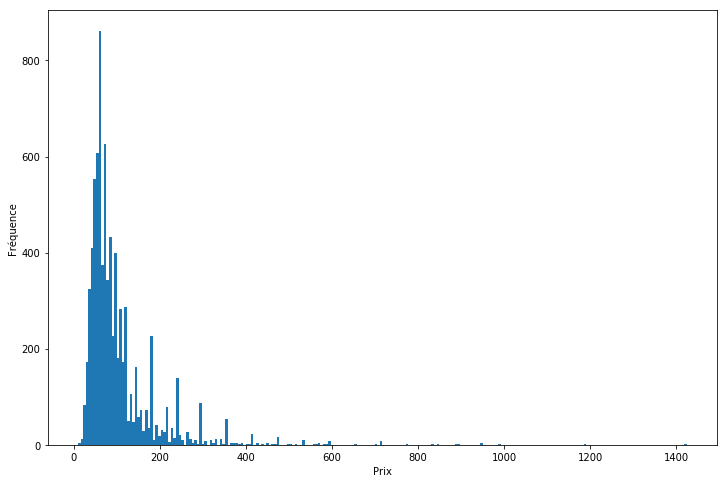

In [4]:
prices = []
for housing in airbnb_data:
    prices.append(housing["price"])
    
show_histogram(prices, "Prix", "Fréquence")

* Utilisez la fonction show_histogram pour afficher les répartitions des prix pour les quartiers 'Bellecour - Cordeliers', 'La Plaine - Santy' et 'Croix-Rousse centre'

### Exercice 6 : Reviews

Sur le même modèle que l'exercice 5, analysez les notes que les locataires donnent aux appartements, via l'information 
`overall_satisfaction`. Générez les histogrammes de répartition des notes par quartier.

----

## Partie 2 : Utilisation du SQL


La base de donnée *airbnb.sqlite* contient les mêmes données que *airbnb.json* mais dans un format différent.

Elle contient deux tables, et voici son schéma : 

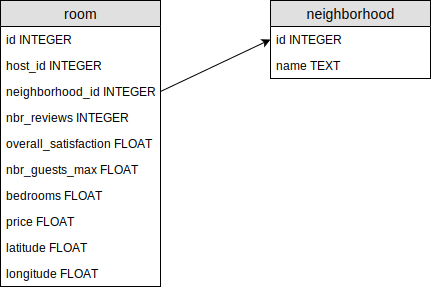

In [1]:
from IPython.core.display import SVG
SVG(filename='images/airbnb_sqlite.svg')

### 2.1 - Utilisation de SQLite en Python

L'accès à une base de donnée SQLite avec Python se fait en deux temps : 

* En premier, la création d'une *connexion* à la base
* Ensuite, la création d'un *curseur* à partir de la *connexion*, qui permet de travailler sur la base

*Note* : Cette façon de faire se retrouve dans la plupart des autres langages de programmation.

Ainsi, pour pouvoir accéder à notre base de donnée *airbnb.sqlite* en python, il vous suffit d'utiliser le code suivant : 

In [4]:
# import du module
import sqlite3

# Création de la connexion
cnx = sqlite3.connect('airbnb.sqlite')

# Création d'un curseur
curs = cnx.cursor()

# Execution d'une requête
curs.execute('SELECT * FROM neighborhood LIMIT 0,5')

# fetchall() recupère tous les résultats de la requête. 
result = curs.fetchall()
for row in result:
    print(row)

(0, 'Bachut - Transvaal')
(1, "Bas des pentes / presqu'île")
(2, 'Bellecour - Carnot')
(3, 'Bellecour - Cordeliers')
(4, 'Champvert - Gorge de Loup')


On remarquera que chaque ligne de résultat est sous forme de tuple.

Voici le même code python, mais modifié pour obtenir les résultats sous forme **de dictionnaire** :

In [6]:
# import du module
import sqlite3

# Définition d'une fonction qui transforme chaque résultat en dictionnaire
def dict_factory(cursor, row):
    d = {}
    for idx, col in enumerate(cursor.description):
        d[col[0]] = row[idx]
    return d

# Création de la connexion
cnx = sqlite3.connect('airbnb.sqlite')

# Définition de la "row factory" qui utilise la fonction définie ci-dessus.
cnx.row_factory = dict_factory

# Création d'un curseur
curs = cnx.cursor()

# Execution d'une requête
curs.execute('SELECT * FROM neighborhood LIMIT 0,5')

# fetchall() recupère tous les résultats de la requête. 
result = curs.fetchall()
for row in result:
    print(row)

{'id': 0, 'name': 'Bachut - Transvaal'}
{'id': 1, 'name': "Bas des pentes / presqu'île"}
{'id': 2, 'name': 'Bellecour - Carnot'}
{'id': 3, 'name': 'Bellecour - Cordeliers'}
{'id': 4, 'name': 'Champvert - Gorge de Loup'}


  
  
 
Pour plus d'informations :   
**Documentation du module** : https://docs.python.org/3.7/library/sqlite3.html

### 2.2 - Exercices


Reprenez tous les exercices de la première partie, mais en utilisant la base de donnée.

----

## Partie 3 - CSV et Pandas


Lors de la formation à distance, vous apprendrez à utiliser un module particulièrement puissant : Pandas.  

Pandas est l'outil de prédilection en Python dès lors qu'il s'agit de traiter des fichiers CSV volumineux.  

Lorsque vous aurez appris à utiliser Pandas, je vous invite à refaire les exercices avec le fichier airbnb.csv.  

Je vous recommande cette "cheat sheet" très complète : https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

----
## En conclusion

à l'issue de ce document, vous aurez appris à utiliser Python pour traiter des données dans 3 formats différents, et en tirer des informations pour faciliter leur analyse.

Dans la suite de votre formation, vous approfondirez ces techniques et découvrirez d'autres outils. Je vous invite à réutiliser ces jeux de données pour tester vos nouvelles compétences.